In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/housing-price/housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.shape

(20640, 10)

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#statistics for missing values
print ("Total_bedrooms column Mode is  "+str(df["total_bedrooms"].mode())+"\n")
print(df["total_bedrooms"].describe())

Total_bedrooms column Mode is  0    280.0
Name: total_bedrooms, dtype: float64

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [9]:
from sklearn.impute import SimpleImputer

In [10]:
print(df.iloc[:,4:5].head())
imputer = SimpleImputer()
imputer.fit(df.iloc[:,4:5])
df.iloc[:,4:5] = imputer.transform(df.iloc[:,4:5])
df.isnull().sum()

   total_bedrooms
0           129.0
1          1106.0
2           190.0
3           235.0
4           280.0


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# Convert object to int/float by label encoder
labelEncoder = LabelEncoder()
print(df["ocean_proximity"].value_counts())
df["ocean_proximity"] = labelEncoder.fit_transform(df["ocean_proximity"])
df["ocean_proximity"].value_counts()
df.describe()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df.drop('median_house_value',axis=1)

In [15]:
y=df['median_house_value']

In [16]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [17]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [18]:
#check for rand_state
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16512, 9) and size 148608
X_test shape (4128, 9) and size 37152
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


In [19]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,4
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,4
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,1
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,1
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,0


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
X_train

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.32290591,
        -0.326196  ,  2.00593172],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.6720272 ,
        -0.03584338,  2.00593172],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.43046109,
         0.14470145,  2.00593172],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.07090859,
        -0.49697313, -0.81854604],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.15490769,
         0.96545045, -0.81854604],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.94776365,
        -0.68544764,  1.29981228]])

In [23]:
X_test

array([[ 0.28534728,  0.1951    , -0.28632369, ..., -0.37008673,
        -1.15508475, -0.1124266 ],
       [ 0.06097472, -0.23549054,  0.11043502, ...,  0.220532  ,
        -0.70865905, -0.1124266 ],
       [-1.42487026,  1.00947776,  1.85617335, ...,  1.21539643,
        -0.21040155,  1.29981228],
       ...,
       [-1.23041404,  0.78014149, -0.28632369, ...,  0.17853244,
         2.80902421, -0.81854604],
       [-0.08860699,  0.52740357,  0.58654547, ..., -0.06821494,
        -0.57542978, -0.1124266 ],
       [ 0.60445493, -0.66608108, -0.92113763, ..., -0.13646421,
        -0.17259111, -0.81854604]])

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
lr.intercept_

207194.69373788778

In [27]:
lr.coef_

array([-85854.94724101, -90946.06271148,  14924.30655143, -17693.23405277,
        48767.60670995, -43884.16852449,  17601.31495096,  77144.10164179,
         -451.52015229])

In [28]:
y_pred=lr.predict(X_test)

In [29]:
y_pred

array([ 75616.18733782, 166419.13655163, 264751.07303087, ...,
       439690.1127737 , 130408.05181885, 175513.56755484])

In [30]:
y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64

Text(0, 0.5, ' Predicted median_house_value')

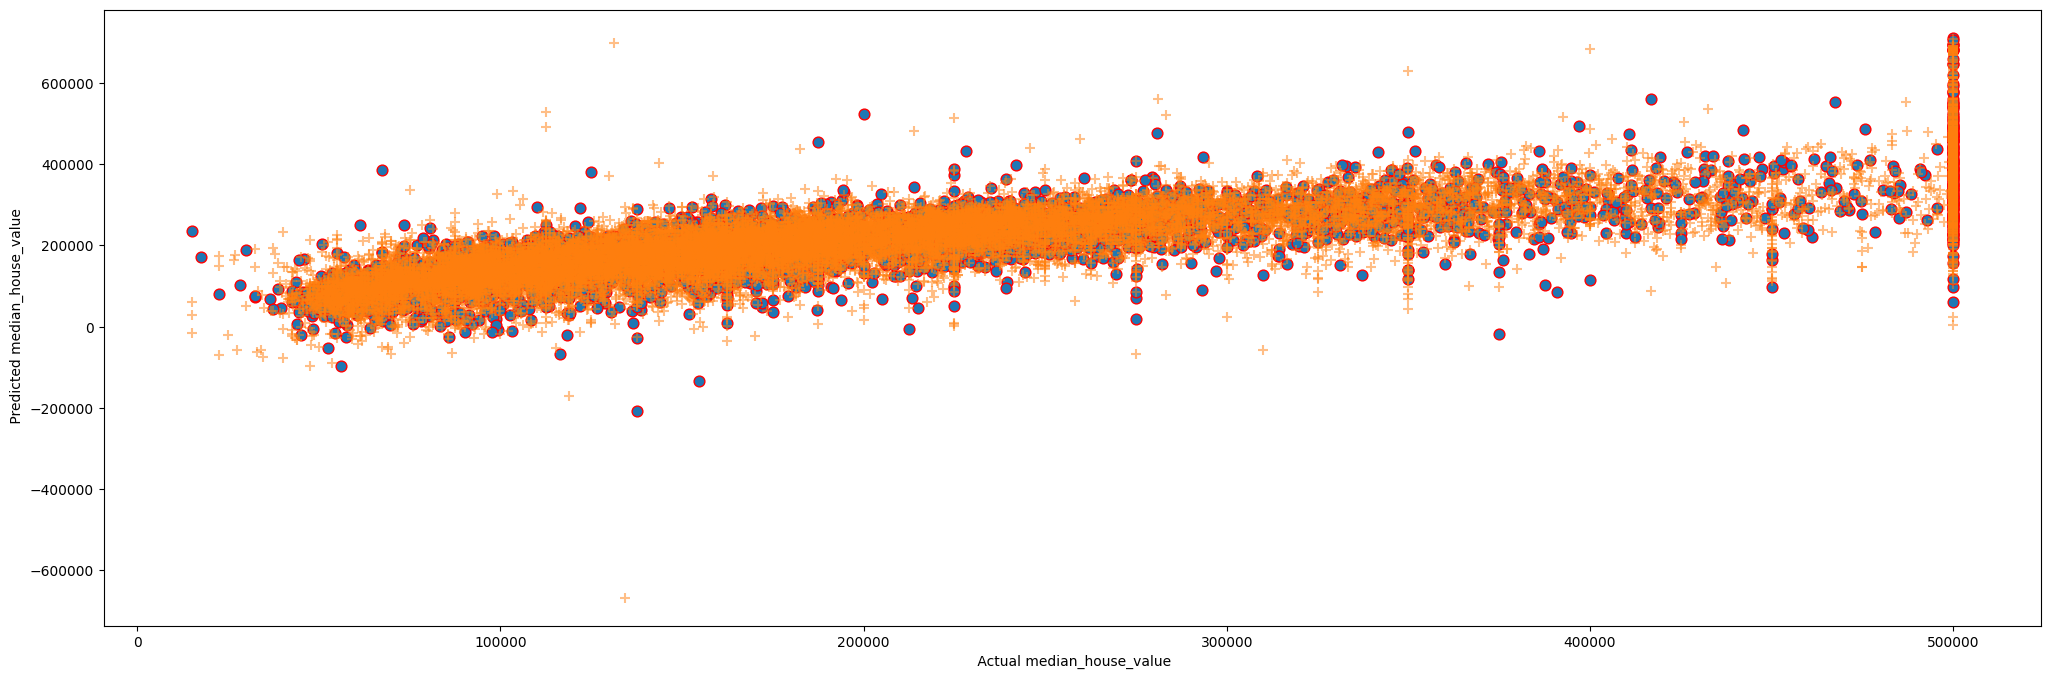

In [31]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test,y_pred,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train,lr.predict(X_train),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

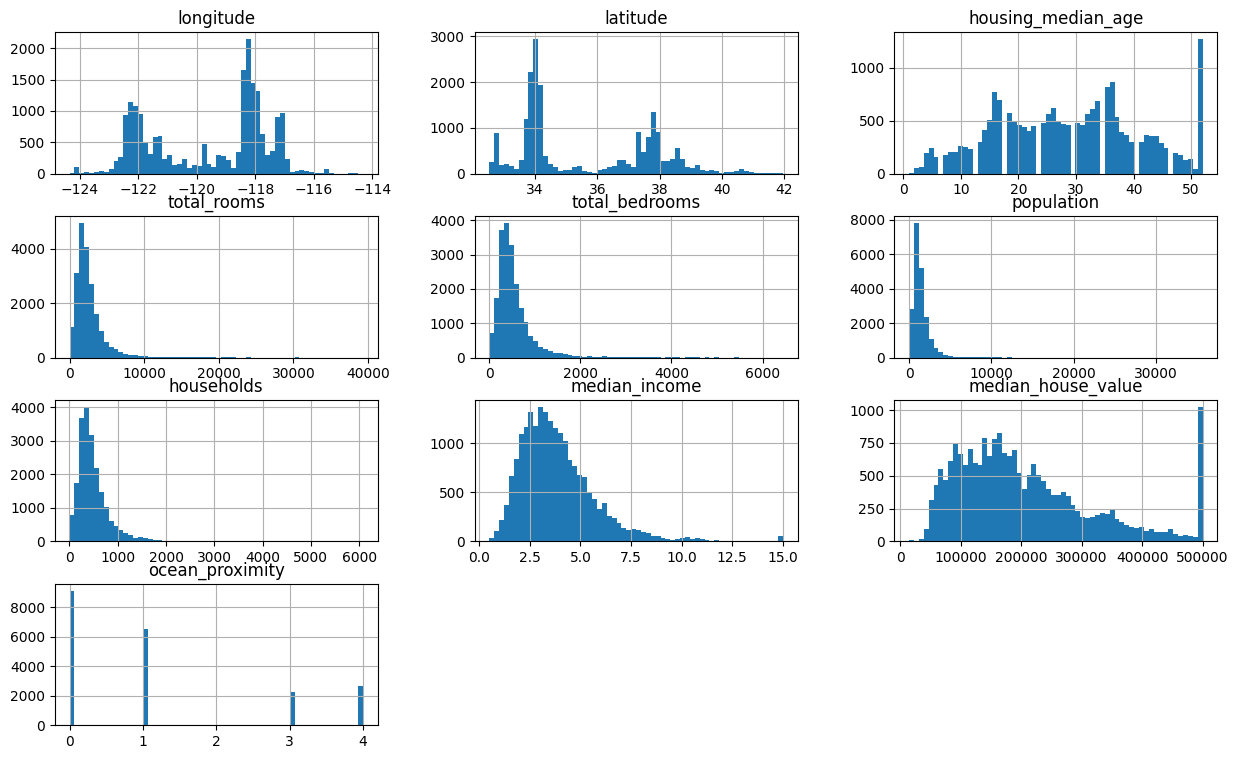

In [32]:
df.hist(bins=60, figsize=(15,9));plt.show()

<Axes: >

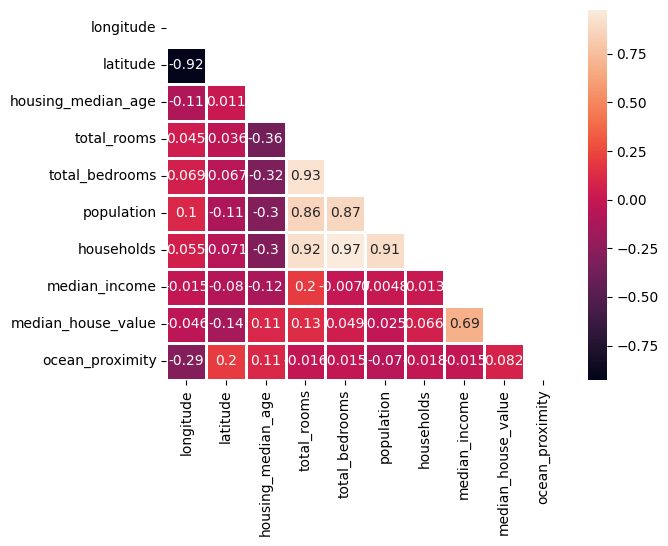

In [33]:
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

sns.heatmap(corr,lw=2,annot=True,square=False,mask=mask)

In [34]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_absolute_error,mean_squared_error

In [35]:
reg_score = r2_score(y_test , y_pred)
print('R squared of linear regression :',reg_score)

R squared of linear regression : 0.6142406531011786


In [36]:

mape = mean_absolute_percentage_error(y_test , y_pred)
print("Mean  absolute precentage error of linear regression (MAPE) : ",mape*100,'%')

reg_mae = mean_absolute_error(y_test , y_pred)
print("Mean  absolute error of linear regression (MAE): ",reg_mae)

mse = mean_squared_error(y_test , y_pred)
print("Mean  Squared error of linear regression (MSE): ",mse)

rmse = np.square((mean_squared_error(y_test , y_pred)))
print("Mean  Squared error of linear regression (RMSE): ",rmse)

Mean  absolute precentage error of linear regression (MAPE) :  31.079949820022 %
Mean  absolute error of linear regression (MAE):  51846.87784903815
Mean  Squared error of linear regression (MSE):  5055025116.165613
Mean  Squared error of linear regression (RMSE):  2.555327892506517e+19
